## Problem Statement

Identifying the best quality wine is a special skill and very few experts are specialized in accurately detecting the quality.
The objective of this project is to simplify the process of detecting the quality of wine.

`CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

**Objective(s):** Minimize Shipment Organization Time

**Constraints:** Minimize Specialists' Dependency
    

**Success Criteria**

- **Business Success Criteria**: Reduce the time of wine quality check to anywhere between 20% to 40%

- **ML Success Criteria**: Achieve Silhouette coefficient of atleast 0.5

- **Economic Success Criteria**: Wine distillers will see an increase in revenues by atleast 20%

**Proposed Plan:**
Grouping the available wines will allow to understand the characteristics of each group.

In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Load Wine data set
wine_df = pd.read_csv(r"C:\Users\Bharani Kumar\Desktop\Data Science using Python & R\Version 2 slides\Datasets\wine_data.csv")

# Show sample of data set
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


### Data Dictionary

- OD_read: Amount of dilution in that particular wine type
- Proline : Amount of Proline in that particular wine type # Proline is typically the most abundant amino acid present in grape juice and wine

## EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***1st Moment Business Decision (Measures of Central Tendency)***

1) Mean

2) Median

3) Mode

In [3]:
print(wine_df.mean())
print('\n')
print(wine_df.median())
print('\n')
print(wine_df.mode())

OD_read      2.611685
Proline    746.893258
dtype: float64


OD_read      2.78
Proline    673.50
dtype: float64


   OD_read  Proline
0     2.87    520.0
1      NaN    680.0


***2nd Moment Business Decision (Measures of Dispersion)***

1) Variance

2) Standard deviation

3) Range (maximum - minimum)

In [4]:
print(wine_df.var())
print('\n')
print(wine_df.std())

OD_read        0.504086
Proline    99166.717355
dtype: float64


OD_read      0.709990
Proline    314.907474
dtype: float64


***3rd Business Moment Decision (Skewness)***

Measure of asymmetry in the data distribution

In [25]:
wine_df.skew()

OD_read   -0.307285
Proline    0.767822
dtype: float64

***4th Business Moment Decision (Kurtosis)***

Measure of peakedness - represents the overall spread in the data

In [26]:
wine_df.kurt()

OD_read   -1.086435
Proline   -0.248403
dtype: float64

***Descriptive Statistics and Data Distribution Function***

In [27]:
wine_df.describe()

,OD_read,Proline
count,178.000000,178.000000
mean,2.611685,746.893258
std,0.709990,314.907474
min,1.270000,278.000000
25%,1.937500,500.500000
50%,2.780000,673.500000
75%,3.170000,985.000000
max,4.000000,1680.000000


## Data Preprocessing and Cleaning

**Typecasting** :

As Python automatically interprets the data types, there may be a requirement for the data type to be converted. The process of converting one data type to another data type is called Typecasting.

Example: 
1) int to float

2) float to int

In [28]:
wine_df.dtypes

OD_read    float64
Proline    float64
dtype: object

**Handling duplicates:**

If the dataset has multiple entries of the same record then we can remove the duplicate entries. In case of duplicates we will use function drop_duplicates()

In [29]:
duplicate = wine_df.duplicated()  # Returns Boolean Series denoting duplicate rows.
print(duplicate)

print(sum(duplicate), '\n')
print(wine_df.shape)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool
1 

(178, 2)


In [30]:
# Removing Duplicates
wine_df = wine_df.drop_duplicates() # Returns DataFrame with duplicate rows removed.
print(wine_df.shape)

(177, 2)


**Missing Value Analysis**

***IMPUTATION:***

The process of dealing with missing values is called Imputation.

Most popular substitution based Imputation techniques are:

1) Mean imputation for numeric data

2) Mode imputation for non-numeric data

In [31]:
wine_df.isnull().sum() # Check for missing values

OD_read    0
Proline    0
dtype: int64

### Outliers Analysis:

Exceptional data values in a variable can be outliers. In case of outliers we can use one of the strategies of 3 R (Rectify, Retain, or Remove)

**Box Plot**

Visualize numeric data using boxplot for outliers

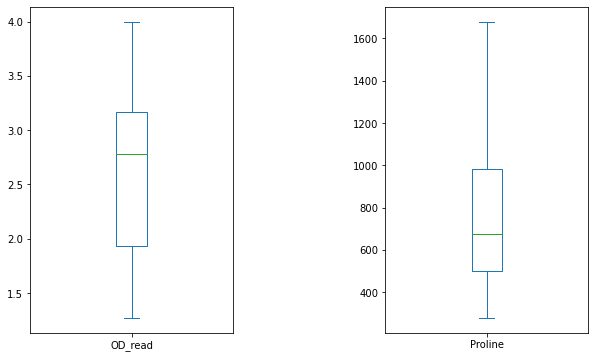

In [33]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

wine_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()  

**No outliers observed**

### Zero and Near Zero Variance

   We dont have any values with near zero (or) zero variance. We can proceed with further data preprocessing steps.

In [34]:
wine_df.var()

OD_read        0.506257
Proline    98807.262776
dtype: float64

### Dummy Variable Creation

In [35]:
wine_df.dtypes  # Verify the data types of the fields for the entire data

OD_read    float64
Proline    float64
dtype: object

## Scatter Plot

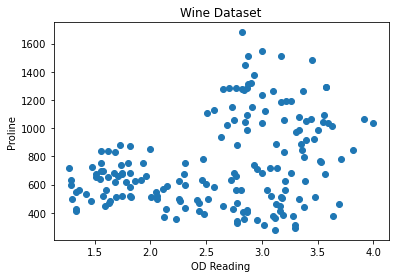

In [36]:
plt.scatter(wine_df.values[:, 0], wine_df.values[:, 1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [37]:
# Generate clusters using Agglomerative Hierarchical Clustering

ac = AgglomerativeClustering(3, linkage = 'average')
ac_clusters = ac.fit_predict(wine_df)

In [38]:
# Generate clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

In [19]:
# Generate clusters using DBSCAN

db_param_options = [[20, 5], [25, 5], [30, 5], [25, 7], [35, 7], [40, 5]]

for ep, min_sample in db_param_options:
    db = DBSCAN(eps = ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.39874666620956795
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35314558258398593
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.4385447900003894
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2656897340492712
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.46097357383412935
Eps:  40 Min Samples:  5
DBSCAN Clustering:  0.5746293909096545


In [39]:
# Generate clusters using DBSCAN
db = DBSCAN(eps = 40, min_samples = 5)
db_clusters = db.fit_predict(wine_df)

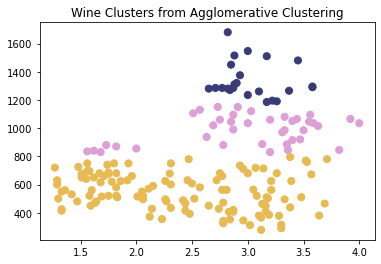

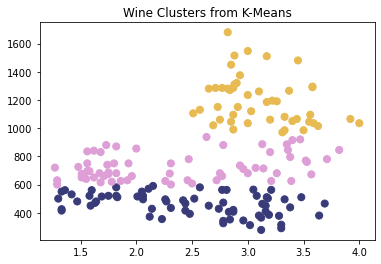

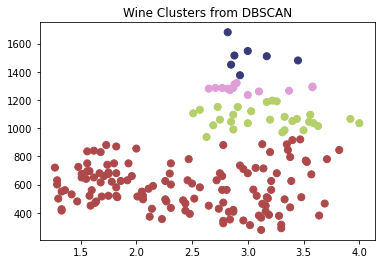

In [43]:
plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c = ac_clusters, s = 50, cmap = 'tab20b')
plt.show()

plt.title("Wine Clusters from K-Means")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c = km_clusters, s = 50, cmap = 'tab20b')
plt.show()

plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine_df['OD_read'], wine_df['Proline'], c = db_clusters, s = 50, cmap = 'tab20b')
plt.show()


In [22]:
# Calculate Silhouette Scores

print("Silhouette Scores for Wine Dataset:\n")

print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))

print("DBSCAN Clustering: ", silhouette_score(wine_df, db_clusters))

Silhouette Scores for Wine Dataset:

Agg Clustering:  0.5995682349948996
K-Means Clustering:  0.5805025797094293
DBSCAN Clustering:  0.5746293909096545
